### The purpose of this case study was to determine the factors which impact employee churn, then to use those factors and predict the likelihood of an employee leaving the company.

### The features involved with employment, and tracked by the traditional human resources department, were used in this analysis; things like whether or not the employee worked overtime, the duration of their commute, their monthly income, their age, how long they have worked for this company, the total length of their work history, their education level, as well as a few others not mentioned here.

### The results revealed that, while there were no perfectly correlated features, there are strong positive correlations between the following factors. The top 10 pairs are listed in descending order of impact:

#### 1.) Job level and monthly income.
#### 2.) Job level and total working years.
#### 3.) Percentage of salary increase and performance.
#### 4.) Monthly income and total working years.
#### 5.) Number of years at the company, and the number of years with the current manager.
#### 6.) Number of years at the company, and the number of years in the current role.
#### 7.) Number of years with the current manager, and the number of years in the current role.
#### 8.) The employee's age and the length of their work history.
#### 9.) The duration of their work history, and the number of years with the company.
#### 10.) The number of years at the company, and the number of years since their last promotion.

 ### Please view the analysis and the procedures below.

#### This is a supervised classification problem.

In [ ]:
# -*- coding: utf-8 -*-
"""
This file was made in Spyder Editor

Created on Sat Mar 17 23:31:45 2019

@author: jevon
"""
# Imports

import numpy as np
from openpyxl import load_workbook
from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile

#data visualisation
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#ML model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#data modeling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier #Need to research this.
from sklearn.ensemble import RandomForestClassifier

#helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

#misc
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

## Explore the data, love the data, be the data.

#### An overview of the data, its shape, and the types involved.

In [ ]:
df_source = pd.read_excel('datasets/WA_Fn-UseC_-HR-Employee-Attrition.xlsx', sheet_name = 0) #add path to Excel source file
print("Shape of dataframe is: {}".format(df_source.shape))

df_human_resources = df_source.copy()

df_human_resources.columns

df_human_resources.head()

df_human_resources.columns.to_series().groupby(df_human_resources.dtypes).groups

Shape of dataframe is: (1470, 35)


{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

##### A closer look at the data types and checking for missing values

In [ ]:
#Datatypes and missing values
df_human_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

#### An description of the numerical features.

In [ ]:
#Overview of numerical features
df_human_resources.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


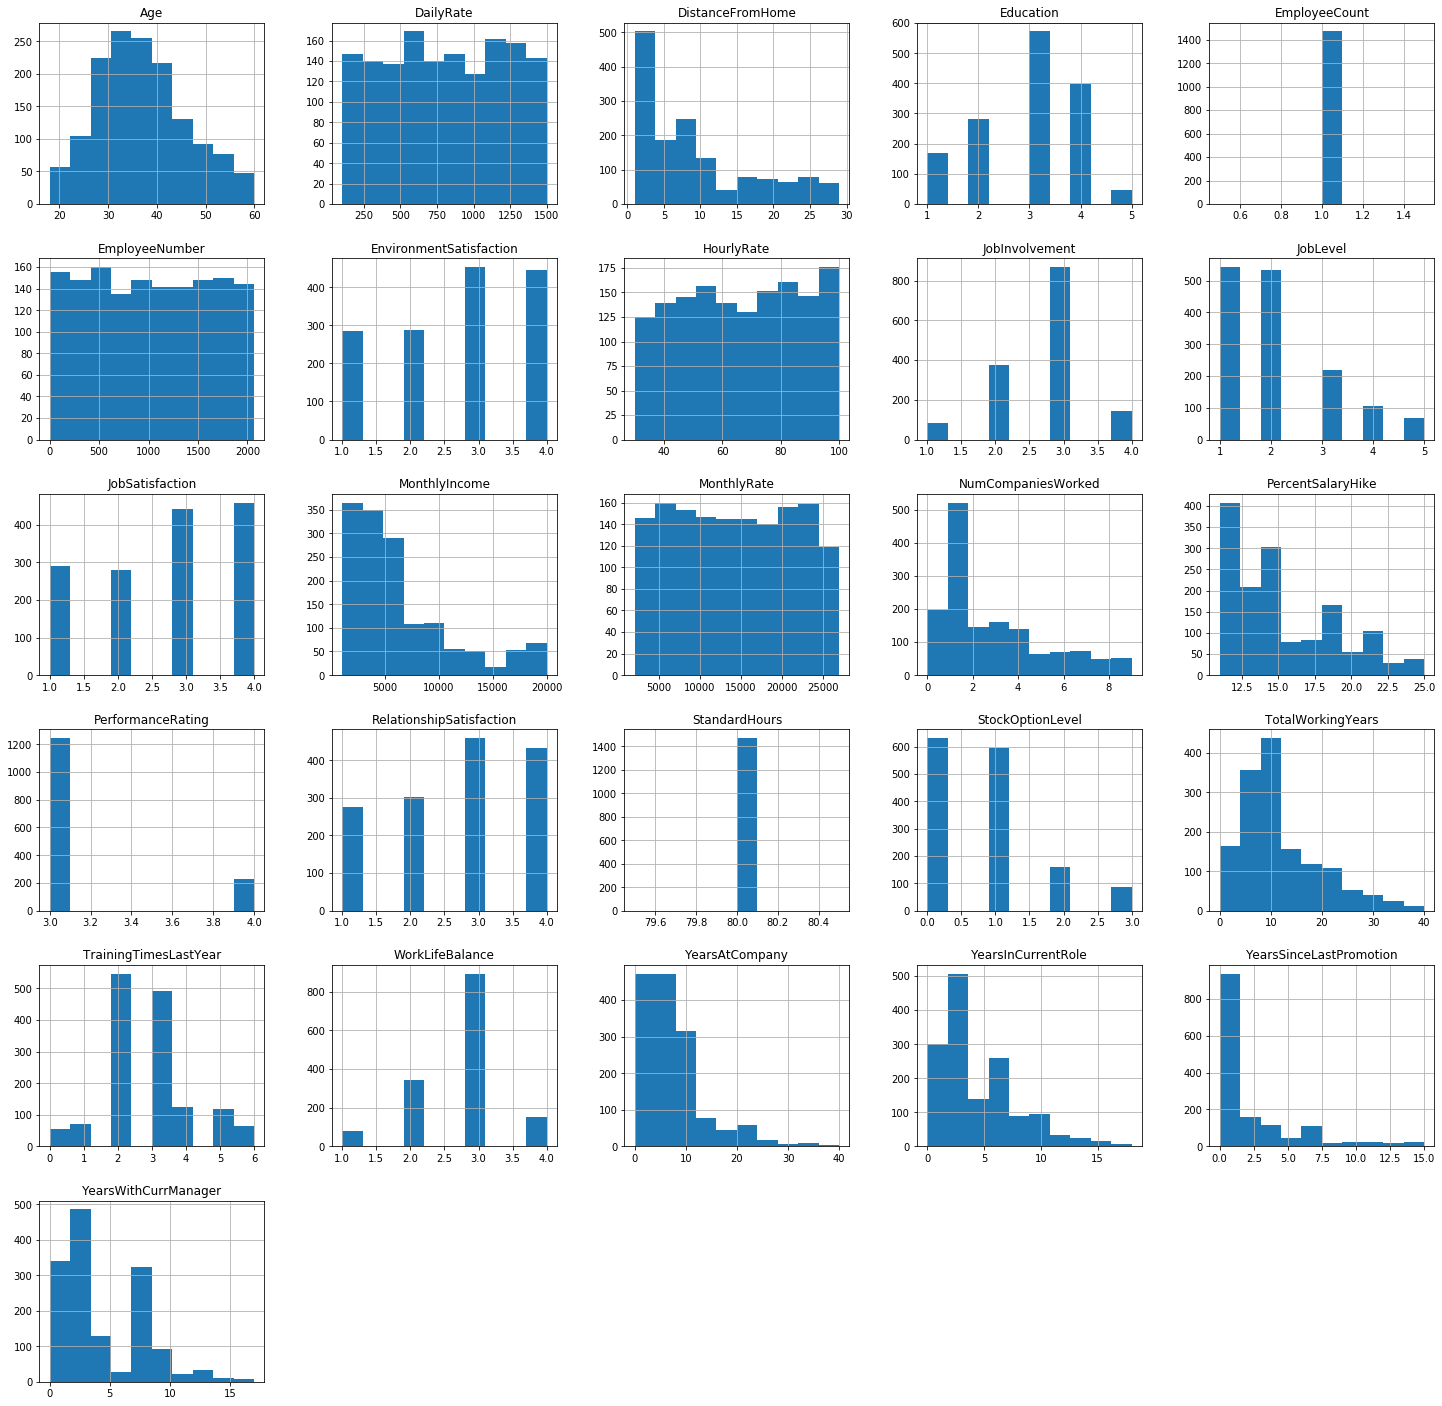

In [ ]:
df_human_resources.hist(figsize=(25,25));

### Overview of features by attribute

##### Begin Age data

In [ ]:
#Begin Age data
(mu, sigma) = norm.fit(df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'Age'])
print('Ex-employee: average age = {:0.2f} years with standard deviation = {:0.2f}' .format(mu, sigma))
(mu, sigma) = norm.fit(df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'Age'])
print('Current employee: average age = {:0.2f} years with standard deviation = {:0.2f}' .format(mu, sigma))


Ex-employee: average age = 33.61 years with standard deviation = 9.67
Current employee: average age = 37.56 years with standard deviation = 8.88


The age distribution of employees by attrition.


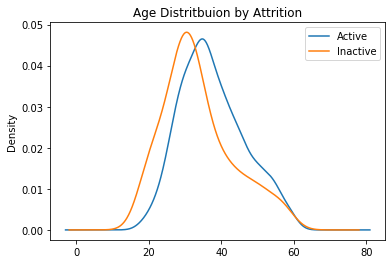

In [ ]:
group_labels = ['Active', 'Inactive']

x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'Age']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'Age']

hist_data = pd.DataFrame(({group_labels[0]: x1, group_labels[1]: x2}))

print('The age distribution of employees by attrition.')

hist_data.plot.kde(title = 'Age Distritbuion by Attrition');

##### Educational Background areas

Normalised education distribution of ex-employees in the dataset: 

Life Sciences: 14.69%
Other: 13.41%
Medical: 13.58%
Marketing: 22.01%
Technical Degree: 24.24%
Human Resources: 25.93%


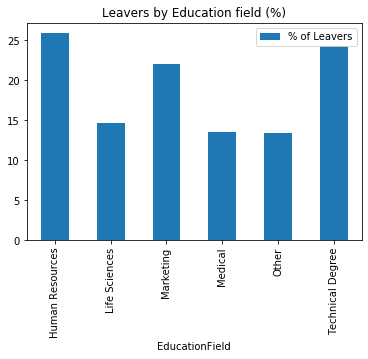

In [ ]:
#Educational Background areas

df_human_resources['EducationField'].value_counts()

print('Normalised education distribution of ex-employees in the dataset: \n')

df_EducationField = pd.DataFrame(columns=["EducationField", "% of Leavers"])
i = 0
for field in list(df_human_resources['EducationField'].unique()):
    ratio = (df_human_resources[(df_human_resources['EducationField']==field)&(df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources["EducationField"]==field].shape[0])
    df_EducationField.loc[i] = (field, ratio*100)
    print(f'{field}: {ratio*100:0.2f}%');
    i += 1

df_EducationFieldGroup = df_EducationField.groupby(by="EducationField").sum()
df_EducationFieldGroup.plot.bar(title='Leavers by Education field (%)');

##### Gender Distribution

Normalised gender distribution of ex-employees in the dataset: Male = 17.01%; Female = 14.80%.


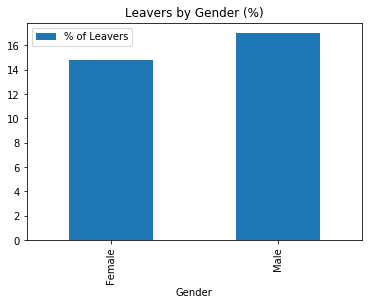

In [ ]:
#Gender distribution

df_human_resources['Gender'].value_counts()

print("Normalised gender distribution of ex-employees in the dataset: Male = {:0.2f}%; Female = {:0.2f}%.".format((df_human_resources[(df_human_resources['Attrition']=="Yes") & (df_human_resources['Gender'] == 'Male')].shape[0] / df_human_resources[df_human_resources['Gender']=='Male'].shape[0])*100, (df_human_resources[(df_human_resources['Attrition']=="Yes") & (df_human_resources['Gender'] == 'Female')].shape[0] / df_human_resources[df_human_resources['Gender']=='Female'].shape[0])*100))

df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i = 0
for field in list(df_human_resources['Gender'].unique()):
    ratio = (df_human_resources[(df_human_resources['Gender']==field)&(df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources["Gender"]==field].shape[0])
    df_Gender.loc[i] = (field, ratio*100)
    i += 1

df_GenderGroup = df_Gender.groupby(by = "Gender").sum()
df_GenderGroup.plot.bar(title = 'Leavers by Gender (%)');



##### Marital Status

Normalised marital status distribution of ex-employees in the dataset: 

Single: 25.53%
Married: 12.48%
Divorced: 10.09%


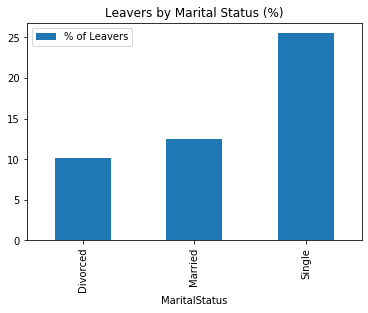

In [ ]:
#Marital Status

df_human_resources['MaritalStatus'].value_counts()

print('Normalised marital status distribution of ex-employees in the dataset: \n')

df_MaritalStatus = pd.DataFrame(columns=["MaritalStatus", "% of Leavers"])
i=0
for field in list(df_human_resources['MaritalStatus'].unique()):
    ratio = df_human_resources[(df_human_resources['MaritalStatus']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['MaritalStatus']==field].shape[0]
    df_MaritalStatus.loc[i] = (field, ratio*100)
    print(f'{field}: {ratio*100:0.2f}%')
    i += 1

df_MaritalStatusGroup = df_MaritalStatus.groupby(by="MaritalStatus").sum()
df_MaritalStatusGroup.plot.bar(title='Leavers by Marital Status (%)');



##### Distance from Home

Distance from home for employees to get to work is from 1.00 to 29.00 miles.
Average distance from home: 
    active employees: 8.92 miles 
    ex-employees: 10.63 miles


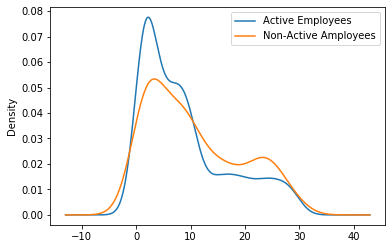

In [ ]:
#Distance from Home

print("Distance from home for employees to get to work is from {:0.2f} to {:0.2f} miles.".format(df_human_resources['DistanceFromHome'].min(), df_human_resources['DistanceFromHome'].max()))

print('Average distance from home: \n    active employees: {:0.2f} miles \n    ex-employees: {:0.2f} miles'.format(df_human_resources[df_human_resources['Attrition']=='No']['DistanceFromHome'].mean(), df_human_resources[df_human_resources['Attrition']=='Yes']['DistanceFromHome'].mean()))

group_labels = ['Active Employees', 'Non-Active Amployees']

x1 = df_human_resources.loc[df_human_resources['Attrition']=='No', 'DistanceFromHome']
x2 = df_human_resources.loc[df_human_resources['Attrition']=='Yes', 'DistanceFromHome']

hist_data = pd.DataFrame({group_labels[0]: x1, group_labels[1]: x2})

hist_data.plot.kde();

#### Begin Department Analysis

Normalised department distribution of ex-employees in the dataset: 

Sales: 20.63%
Research & Development: 13.84%
Human Resources: 19.05%


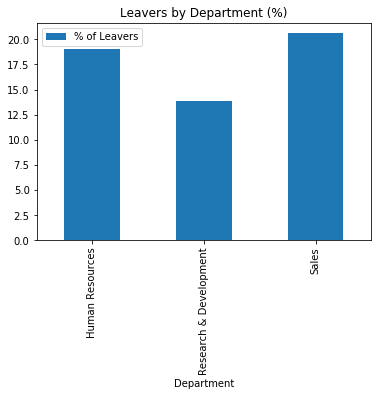

In [ ]:
#Begin Department data analysis

df_human_resources['Department'].value_counts()

print('Normalised department distribution of ex-employees in the dataset: \n')

df_Department = pd.DataFrame(columns = ["Department", "% of Leavers"])

i=0
for field in list(df_human_resources['Department'].unique()):
    ratio = df_human_resources[(df_human_resources['Department']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    print(f'{field}: {ratio*100:0.2f}%')
    i += 1

df_DepartmentGroup = df_Department.groupby('Department').sum()

df_DepartmentGroup = df_Department.groupby(by='Department').sum()
df_DepartmentGroup.plot.bar(title="Leavers by Department (%)");

#### Frequency of Travel, Job Roles, Job Level, and Job Involvement

Normalised frequency of travel distribution of ex-employees in the dataset: 

Travel_Rarely: 14.96%
Travel_Frequently: 24.91%
Non-Travel: 8.00%


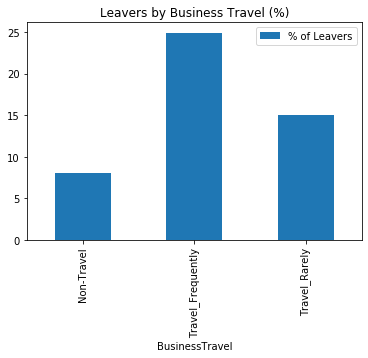

In [ ]:
#Frequency of Travel, Job Roles, Job Level, and Job Involvement

df_human_resources['BusinessTravel'].value_counts()

print('Normalised frequency of travel distribution of ex-employees in the dataset: \n')

df_BusinessTravel = pd.DataFrame(columns=["BusinessTravel", "% of Leavers"])
i = 0
for field in list(df_human_resources['BusinessTravel'].unique()):
    ratio = df_human_resources[(df_human_resources['BusinessTravel']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    print(f'{field}: {ratio*100:0.2f}%')
    i += 1

df_BusinessTravel_Group = df_BusinessTravel.groupby(by="BusinessTravel").sum()
df_BusinessTravel_Group.plot.bar(title='Leavers by Business Travel (%)');

Normalised job role distribution of ex-employees in the dataset: 

Sales Executive: 17.48%
Research Scientist: 16.10%
Laboratory Technician: 23.94%
Manufacturing Director: 6.90%
Healthcare Representative: 6.87%
Manager: 4.90%
Sales Representative: 39.76%
Research Director: 2.50%
Human Resources: 23.08%


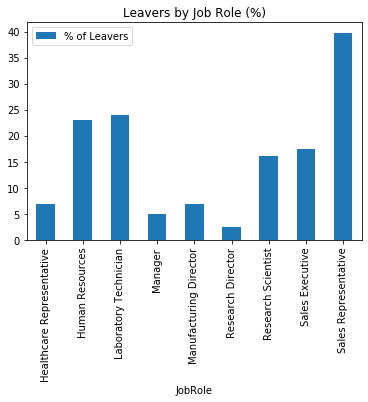

In [ ]:
df_human_resources['JobRole'].value_counts()

print('Normalised job role distribution of ex-employees in the dataset: \n')

df_JobRole = pd.DataFrame(columns=["JobRole", "% of Leavers"])
i = 0
for field in list(df_human_resources['JobRole'].unique()):
    ratio = df_human_resources[(df_human_resources['JobRole']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    print(f'{field}: {ratio*100:0.2f}%')
    i += 1

df_JobRole_Group = df_JobRole.groupby(by="JobRole").sum()
df_JobRole_Group.plot.bar(title='Leavers by Job Role (%)');

Normalised job level distribution of ex-employees in the dataset: 

1: 26.34%
2: 9.74%
3: 14.68%
4: 4.72%
5: 7.25%


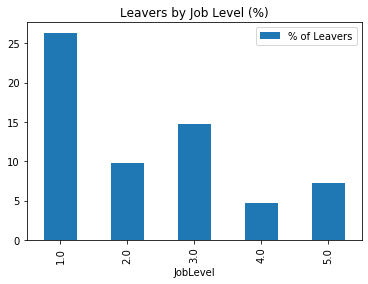

In [ ]:
df_human_resources['JobLevel'].value_counts()
job_level_dict = {}

print('Normalised job level distribution of ex-employees in the dataset: \n')

df_JobLevel = pd.DataFrame(columns=["JobLevel", "% of Leavers"])
i = 0
for field in list(df_human_resources['JobLevel'].unique()):
    ratio = df_human_resources[(df_human_resources['JobLevel']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    job_level_dict[field] = ratio
#     print(f'{field}: {ratio*100:0.2f}%')
    i += 1

[print(f'{key}: {value*100:0.2f}%') for (key, value) in sorted(job_level_dict.items())]
df_JobLevel_Group = df_JobLevel.groupby(by="JobLevel").sum()
df_JobLevel_Group.plot.bar(title='Leavers by Job Level (%)');

Normalised job involvement distribution of ex-employees in the dataset: 

1: 33.73%
2: 18.93%
3: 14.40%
4: 9.03%


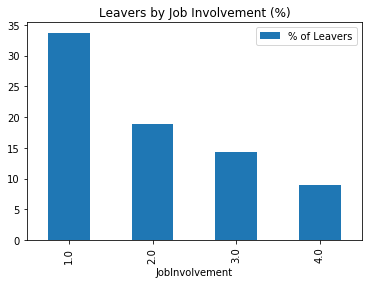

In [ ]:
df_human_resources['JobInvolvement'].value_counts()

print('Normalised job involvement distribution of ex-employees in the dataset: \n')

job_involvement_dict = {}

df_JobInvolvement = pd.DataFrame(columns=["JobInvolvement", "% of Leavers"])
i = 0
for field in list(df_human_resources['JobInvolvement'].unique()):
    ratio = df_human_resources[(df_human_resources['JobInvolvement']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    job_involvement_dict[field] = ratio
    i += 1

[print(f'{key}: {value*100:0.2f}%') for (key, value) in sorted(job_involvement_dict.items())]
df_JobInvolvement_Group = df_JobInvolvement.groupby(by="JobInvolvement").sum()
df_JobInvolvement_Group.plot.bar(title='Leavers by Job Involvement (%)');

#### Training Incidents

Number of training incidents last year varies from 0.00 to 6.00 years. 

Current eployees averaged 2.83 training incidents in the last year,
with a standard deviation of 1.29. 

Ex-employees averaged 2.62 training incidents in the last year,
with a standard deviation of 1.25. 



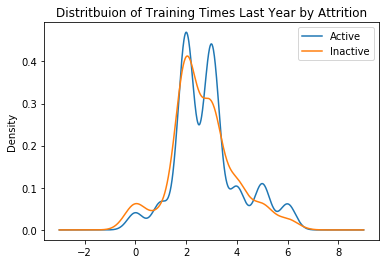

In [ ]:
#Training incidents

print("Number of training incidents last year varies from {:0.2f} to {:0.2f} years. \n".format(df_human_resources['TrainingTimesLastYear'].min(), df_human_resources['TrainingTimesLastYear'].max()))

group_labels = ['Active', 'Inactive']
x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'TrainingTimesLastYear']

hist_data = pd.DataFrame({group_labels[0]: x1, group_labels[1]: x2})

print(f'Current eployees averaged {x1.mean():0.2f} training incidents in the last year,')
print(f'with a standard deviation of {x1.std():0.2f}. \n')
print(f'Ex-employees averaged {x2.mean():0.2f} training incidents in the last year,')
print(f'with a standard deviation of {x2.std():0.2f}. \n')
hist_data.plot.kde(title = 'Distritbuion of Training Times Last Year by Attrition');

#### Number of Companies Worked Prior

Normalised distribution for number of prior companies worked of ex-employees in the dataset: 

0: 11.68%
1: 18.81%
2: 10.96%
3: 10.06%
4: 12.23%
5: 25.40%
6: 22.86%
7: 22.97%
8: 12.24%
9: 23.08%


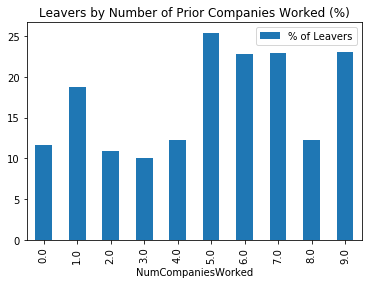

In [ ]:
#Number of Companies worked prior

print('Normalised distribution for number of prior companies worked of ex-employees in the dataset: \n')

num_of_companies_dict = {}

df_NumberOfCompaniesWorked = pd.DataFrame(columns=["NumCompaniesWorked", "% of Leavers"])
i = 0
for field in list(df_human_resources['NumCompaniesWorked'].unique()):
    ratio = df_human_resources[(df_human_resources['NumCompaniesWorked']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['NumCompaniesWorked']==field].shape[0]
    df_NumberOfCompaniesWorked.loc[i] = (field, ratio*100)
    num_of_companies_dict[field] = ratio
    i += 1

[print(f'{key}: {value*100:0.2f}%') for (key, value) in sorted(num_of_companies_dict.items())]
df_NumberOfCompaniesWorked_Group = df_NumberOfCompaniesWorked.groupby(by="NumCompaniesWorked").sum()
df_NumberOfCompaniesWorked_Group.plot.bar(title='Leavers by Number of Prior Companies Worked (%)');




#### Number of Years at Company

The number of years spent at this company varies from  0.00 to 40.00.
Average number of years spent at the company for 
    currently active employees: 7.37, 
    ex-employees: 5.13


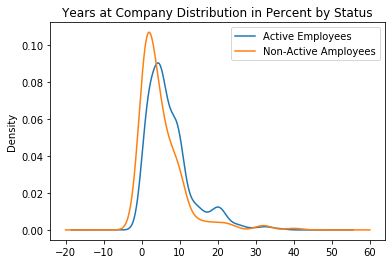

In [ ]:
#Number of Years at Company

df_human_resources

print("The number of years spent at this company varies from  {:0.2f} to {:0.2f}.".format(df_human_resources['YearsAtCompany'].min(), df_human_resources['YearsAtCompany'].max()))

print('Average number of years spent at the company for \n    currently active employees: {:0.2f}, \n    ex-employees: {:0.2f}'.format(df_human_resources[df_human_resources['Attrition']=='No']['YearsAtCompany'].mean(), df_human_resources[df_human_resources['Attrition']=='Yes']['YearsAtCompany'].mean()))

group_labels = ['Active Employees', 'Non-Active Amployees']
x1 = df_human_resources.loc[df_human_resources['Attrition']=='No', 'YearsAtCompany']
x2 = df_human_resources.loc[df_human_resources['Attrition']=='Yes', 'YearsAtCompany']

hist_data =  pd.DataFrame({group_labels[0]: x1, group_labels[1]: x2})
hist_data.plot.kde(title='Years at Company Distribution in Percent by Status');

#### Years with Current Manager

The number of years spent with the current manager varies from  0.00 to 17.00.
Average number of years spent with the current manager: 
     currently active employees: 4.37, 
     ex-employees: 2.85


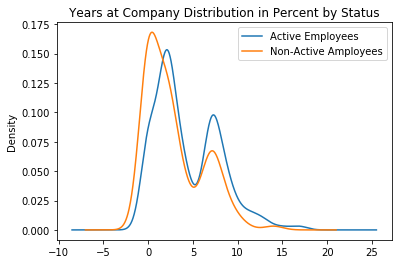

In [ ]:
#Years with Current Manager

print("The number of years spent with the current manager varies from  {:0.2f} to {:0.2f}.".format(df_human_resources['YearsWithCurrManager'].min(), df_human_resources['YearsWithCurrManager'].max()))

print('Average number of years spent with the current manager: \n     currently active employees: {:0.2f}, \n     ex-employees: {:0.2f}'.format(df_human_resources[df_human_resources['Attrition']=='No']['YearsWithCurrManager'].mean(), df_human_resources[df_human_resources['Attrition']=='Yes']['YearsWithCurrManager'].mean()))

group_labels = ['Active Employees', 'Non-Active Amployees']
x1 = df_human_resources.loc[df_human_resources['Attrition']=='No', 'YearsWithCurrManager']
x2 = df_human_resources.loc[df_human_resources['Attrition']=='Yes', 'YearsWithCurrManager']

hist_data = pd.DataFrame({group_labels[0]: x1, group_labels[1]: x2})
hist_data.plot.kde(title='Years at Company Distribution in Percent by Status');

#### Work Life Balance

Normalised work life balance distribution of ex-employees in the dataset: 

1: 31.25%
2: 16.86%
3: 14.22%
4: 17.65%


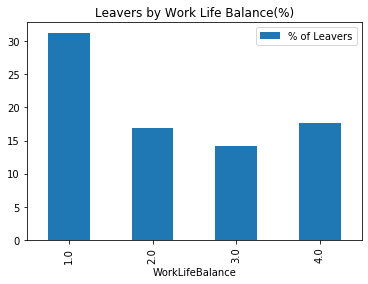

In [ ]:
#Work Life Balance

df_human_resources['WorkLifeBalance'].value_counts()

print('Normalised work life balance distribution of ex-employees in the dataset: \n')

work_life_balance_dict = {}
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i = 0
for field in list(df_human_resources['WorkLifeBalance'].unique()):
    ratio = df_human_resources[(df_human_resources['WorkLifeBalance']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    work_life_balance_dict[field] = ratio
    i += 1

[print(f'{key}: {value*100:0.2f}%') for (key, value) in sorted(work_life_balance_dict.items())]
df_WorkLifeBalance_Group = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WorkLifeBalance_Group.plot.bar(title='Leavers by Work Life Balance(%)');

In [ ]:
# x1 = df_human_resources['StandardHours'].value_counts()
# x2 = df_human_resources['OverTime'].value_counts()

#### Overtime Worked

A normalised distribution for overtime worked of ex-employees in the dataset: 

For overtime worked 'Yes', the ratio of leavers is 30.53%
For overtime worked 'No', the ratio of leavers is 10.44%


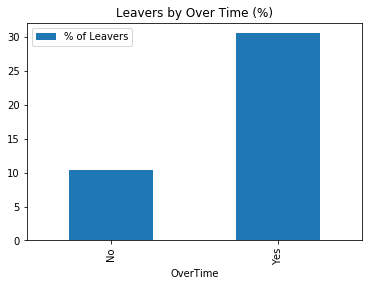

In [ ]:
print('A normalised distribution for overtime worked of ex-employees in the dataset: \n')

df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i = 0
for field in list(df_human_resources['OverTime'].unique()):
    ratio = df_human_resources[(df_human_resources['OverTime']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    print("For overtime worked '{}', the ratio of leavers is {:.2f}%".format(field, ratio*100))

df_OverTime_Group = df_OverTime.groupby(by="OverTime").sum()
df_OverTime_Group.plot.bar(title='Leavers by Over Time (%)');



#### Compensation Information

Employee Hourly Rate ranges from $30.00 to $100.00.
Employee Daily Rate ranges from $102.00 to $1499.00.
Employee Monthly Rate ranges from $2094.00 to $26999.00.
Employee Monthly Income ranges from $1009.00 to $19999.00.


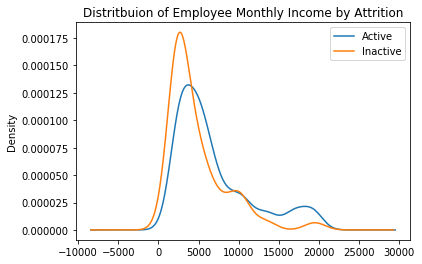

In [ ]:
#Compensation information

print("Employee Hourly Rate ranges from ${:0.2f} to ${:0.2f}.".format(df_human_resources['HourlyRate'].min(), df_human_resources['HourlyRate'].max()))

print("Employee Daily Rate ranges from ${:0.2f} to ${:0.2f}.".format(df_human_resources['DailyRate'].min(), df_human_resources['DailyRate'].max()))

print("Employee Monthly Rate ranges from ${:0.2f} to ${:0.2f}.".format(df_human_resources['MonthlyRate'].min(), df_human_resources['MonthlyRate'].max()))

print("Employee Monthly Income ranges from ${:0.2f} to ${:0.2f}.".format(df_human_resources['MonthlyIncome'].min(), df_human_resources['MonthlyIncome'].max()))

group_labels = ['Active', 'Inactive']
x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'MonthlyIncome']

hist_data = pd.DataFrame({group_labels[0]: x1, group_labels[1]: x2})
hist_data.plot.kde(title = 'Distritbuion of Employee Monthly Income by Attrition');

Percentage salary hikes range from 11.00% to 25.00%.


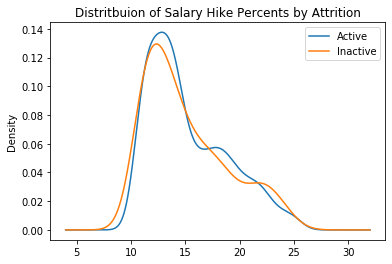

In [ ]:
print("Percentage salary hikes range from {:0.2f}% to {:0.2f}%.".format(df_human_resources['PercentSalaryHike'].min(), df_human_resources['PercentSalaryHike'].max()))

group_labels = ['Active', 'Inactive']
x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'PercentSalaryHike']

hist_data = pd.DataFrame({group_labels[0]: x1, group_labels[1]: x2})
hist_data.plot.kde(title = 'Distritbuion of Salary Hike Percents by Attrition');

## Analyze the Data

### Satisfaction and Performance

Percentage of Current Employees is 83.88% and of Ex-employees is: 16.12%


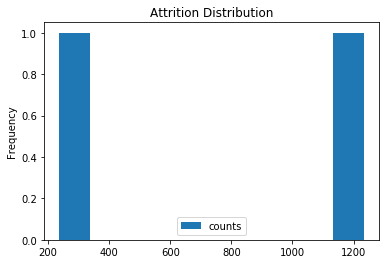

In [ ]:
#Satisfaction and Performance




#Attrition and Correlation
df_human_resources['Attrition'].value_counts()

print("Percentage of Current Employees is {:.2f}% and of Ex-employees is: {:.2f}%".format(
    df_human_resources[df_human_resources['Attrition'] == 'No'].shape[0] / df_human_resources.shape[0]*100, df_human_resources[df_human_resources['Attrition'] == 'Yes'].shape[0] / df_human_resources.shape[0]*100))

# df_human_resources['Attrition'].plot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

titles = ['Attrition', 'counts']
attrition_dataframe = pd.DataFrame({titles[0]: df_human_resources['Attrition'], titles[1]: df_human_resources['Attrition'].value_counts()})
attrition_dataframe.plot.hist(title='Attrition Distribution');

In [ ]:
df_human_resoures_transpose = df_human_resources.copy()
df_human_resoures_transpose['Target'] = df_human_resoures_transpose['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_human_resoures_transpose = df_human_resoures_transpose.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_human_resoures_transpose.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('Most Negative Correlations: \n', correlations.head(5))


corr = df_human_resoures_transpose.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64
Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


### Heatmap

The strongest correlation is job level and monthly income.


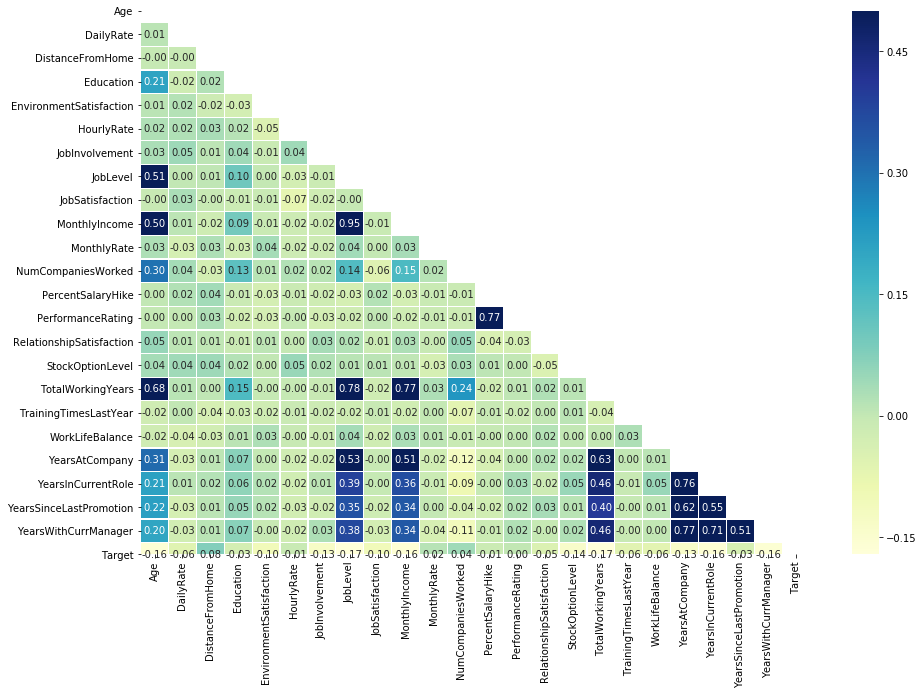

In [ ]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmax=.5, mask=mask, annot=True, fmt='0.2f', linewidths=.2, cmap="YlGnBu");

#### The strongest correlation is job level and monthly income.

### Prepare the Data for the machine learning models.

#### Label Encoding

In [ ]:
#label encoding object

label_encoder = LabelEncoder()

print(df_human_resources.shape)
df_human_resources.head()



(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Label Encoding Columns with Values <=2

In [ ]:
#label encoding columns with values <= 2

label_encoder_count = 0
for col in df_human_resources.columns[1:] :
    if df_human_resources[col].dtype == 'object':
        if len(list(df_human_resources[col].unique())) <= 2 :
            label_encoder.fit(df_human_resources[col])
            df_human_resources[col] = label_encoder.transform(df_human_resources[col])
            label_encoder_count += 1

print('{} columns were label enconded.'.format(label_encoder_count))

df_human_resources = pd.get_dummies(df_human_resources, drop_first = True)

print(df_human_resources.shape)
df_human_resources.head()



4 columns were label enconded.
(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
scale = MinMaxScaler(feature_range=(0, 5))
humRes_col = list(df_human_resources.columns)
humRes_col.remove('Attrition')

for col in humRes_col:
    df_human_resources[col] = df_human_resources[col].astype(float)

df_human_resources['Attrition'] = pd.to_numeric(df_human_resources['Attrition'], downcast = 'float')
df_human_resources.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41.0,1.0,1102.0,1.0,2.0,1.0,1.0,2.0,0.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,0.0,1.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49.0,0.0,279.0,8.0,1.0,1.0,2.0,3.0,1.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,0.0,0.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,1373.0,2.0,2.0,1.0,4.0,4.0,1.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,0.0,1.0,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1392.0,3.0,4.0,1.0,5.0,4.0,0.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,0.0,1.0,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27.0,0.0,591.0,2.0,1.0,1.0,7.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,0.0,0.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print('Size of fully enconded dataset: {}'.format(df_human_resources.shape))

Size of fully enconded dataset: (1470, 49)


#### Assign a new target to a new dataframe and cast as a numerical feature

In [ ]:
#Assigning the target to a new dataframe and casting as a numerical feature
target = df_human_resources['Attrition'].copy()

trainX, testX, trainy, testy = train_test_split(df_human_resources, target, test_size = 0.25, random_state = 7, stratify = target)

print('Size of trainX dataset: ', trainX.shape)
print('Size of trainy dataset: ', trainy.shape)
print('Size of testX dataset: ', testX.shape)
print('Size of testy dataset: ', testy.shape)

Size of trainX dataset:  (1102, 49)
Size of trainy dataset:  (1102,)
Size of testX dataset:  (368, 49)
Size of testy dataset:  (368,)


### Logistic regression

In [ ]:

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier( n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))


In [ ]:
acc_results = []
auc_results = []
names = []
columns = [['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']]
df_results = pd.DataFrame(columns = columns)

i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cross_validation_acc_results = model_selection.cross_val_score(
        model, trainX, trainy, cv=kfold, scoring='accuracy')
    cross_validation_auc_results = model_selection.cross_val_score(model, trainX, trainy, cv=kfold, scoring='roc_auc')

    acc_results.append(cross_validation_acc_results)
    auc_results.append(cross_validation_auc_results)
    names.append(name)
    df_results.loc[i] = [name, round(cross_validation_acc_results.mean()*100, 2), round(cross_validation_auc_results.std()*100, 2), round(cross_validation_acc_results.mean()*100, 2), round(cross_validation_auc_results.std()*100, 2)]
    i += 1

# df_results.sort_values(by=['ROC AUC Mean'], ascending=False)
print(df_results)

                  Algorithm ROC AUC Mean ROC AUC STD Accuracy Mean  \
0       Logistic Regression       100.00        0.00        100.00   
1             Random Forest       100.00        0.00        100.00   
2                       SVM        83.84        0.00         83.84   
3                       KNN        82.22        6.92         82.22   
4  Decision Tree Classifier       100.00        0.00        100.00   
5               Gaussian NB        99.45        1.85         99.45   

  Accuracy STD  
0         0.00  
1         0.00  
2         0.00  
3         6.92  
4         0.00  
5         1.85  


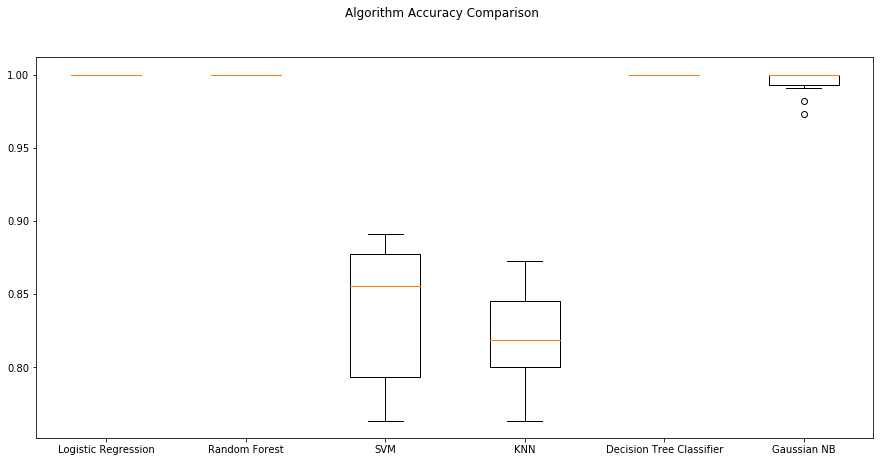

In [ ]:

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()



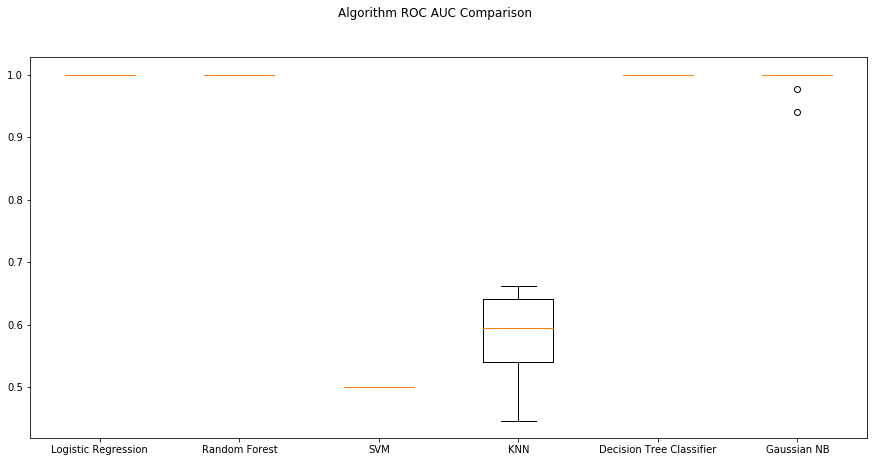

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()


In [ ]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, trainX, trainy, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))



AUC score (STD): 1.00 (0.00)


In [ ]:
parameter_grid = {'C': np.arange(1e-03, 2, 0.01)}
logis_gsch = GridSearchCV(LogisticRegression(solver='liblinear'), iid = True, return_train_score = True, param_grid = parameter_grid, scoring = 'roc_auc', cv = 10)


logis_grid = logis_gsch.fit(trainX, trainy)
logis_gopt = logis_grid.best_estimator_
result = logis_gsch.cv_results_

print('='*32)
print('best estimator: ' + str(logis_gsch.best_estimator_))
print('best parameters: ' + str(logis_gsch.best_params_))
print('best score: ', logis_gsch.best_score_)
print('='*32)

best estimator: LogisticRegression(C=0.17099999999999999, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best parameters: {'C': 0.17099999999999999}
best score:  1.0


In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
model_cross_validation = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model_cross_validation, trainX, trainy, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 1.00 (0.00)


In [ ]:
logis_gopt.fit(trainX, trainy)
probably = logis_gopt.predict_proba(testX)
probably = probably[:, 1]
log_roc_auc = roc_auc_score(testy, probably)
print('AUC: %0.3f' % log_roc_auc)

AUC: 1.000


### Random Forest

In [ ]:
#Random Forest

random_forest_classifier = RandomForestClassifier(class_weight = "balanced", random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(random_forest_classifier, iid=True, return_train_score=True, param_grid=param_grid, scoring='roc_auc', cv=10)

grid_fit = grid_obj.fit(trainX, trainy)
random_forest_optimization = grid_fit.best_estimator_

print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best score: 1.0


#### Feature Importance

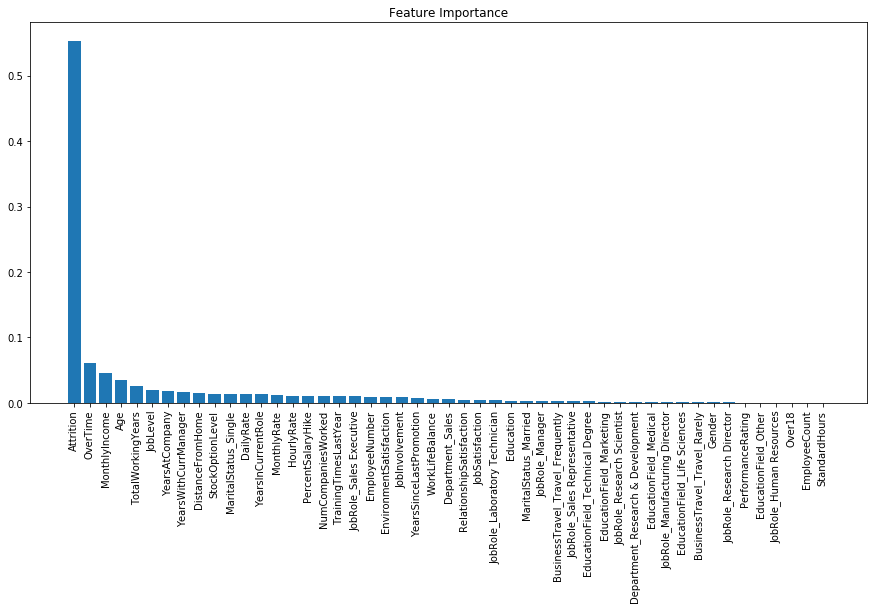

In [ ]:
importances = random_forest_optimization.feature_importances_
indices = np.argsort(importances)[::-1]
names = [trainX.columns[i] for i in indices]
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(trainX.shape[1]), importances[indices])
plt.xticks(range(trainX.shape[1]), names, rotation=90)
plt.show()

#### Feature Importance with Coefficient

In [ ]:
importances = random_forest_optimization.feature_importances_
df_paramater_coefficient = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = trainX.columns[i]
    coeff = importances[i]
    df_paramater_coefficient.loc[i] = (feat, coeff)
df_paramater_coefficient.sort_values(by='Coefficient', ascending=False, inplace=True)
df_paramater_coefficient = df_paramater_coefficient.reset_index(drop=True)
df_paramater_coefficient.head(10)

,Feature,Coefficient
0,Attrition,0.553677
1,OverTime,0.061408
2,MonthlyIncome,0.046103
3,Age,0.035267
4,TotalWorkingYears,0.025376
5,JobLevel,0.020006
6,YearsAtCompany,0.018288
7,YearsWithCurrManager,0.016373
8,DistanceFromHome,0.015431
9,StockOptionLevel,0.014389


#### Confusion Matrix

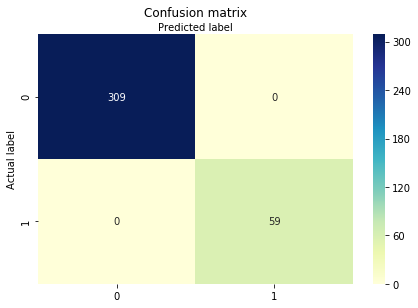

In [ ]:
confuson_matrix = metrics.confusion_matrix(testy, random_forest_optimization.predict(testX))
class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

sns.heatmap(pd.DataFrame(confuson_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:
print('Accuracy of RandomForest Regression Classifier on test set: {:0.2f}'.format(random_forest_optimization.score(testX, testy)*100))
random_forest_optimization.fit(trainX, trainy)
print(classification_report(testy, random_forest_optimization.predict(testX)))

Accuracy of RandomForest Regression Classifier on test set: 100.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       309
         1.0       1.00      1.00      1.00        59

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



In [ ]:
random_forest_optimization.fit(trainX, trainy)
probs = random_forest_optimization.predict_proba(testX)
probs = probs[:, 1]
random_forest_optimization_roc_auc = roc_auc_score(testy, probs)
print('AUC score: %0.3f' % random_forest_optimization_roc_auc)

AUC score: 1.000


In [ ]:
ranFor_class = RandomForestClassifier(class_weight = 'balanced', random_state = 7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [5, 10, 15, 20, 25, 30]}
grid_object = GridSearchCV(ranFor_class, iid = True, return_train_score = True, param_grid = param_grid, scoring = 'roc_auc', cv = 10)

fitGrid = grid_object.fit(trainX, trainy)
ranFor_opt = fitGrid.best_estimator_

print('='*30)
print('best: ' + str(grid_object.best_estimator_))
print('best: ' + str(grid_object.best_params_))
print('best: ', grid_object.best_score_)
print('='*30)

best: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best:  1.0


In [ ]:
ranFor_opt.fit(trainX, trainy)
probably2 = ranFor_opt.predict_proba(testX)
probably2 = probably2[:, 1]
ranFor_opt_roc_auc = roc_auc_score(testy, probably2)
print('AUC: %0.3f' % ranFor_opt_roc_auc)

AUC: 1.000


#### Plot the ROC AUC curves

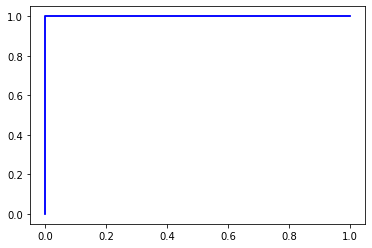

Wouldn't actually expect them to be vastly different.
The dataset is perfectly split between '1' and '0'.


In [ ]:
fpr, tpr, thresholds = roc_curve(testy, logis_gopt.predict_proba(testX)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(testy, random_forest_optimization.predict_proba(testX)[:,1])
plt.plot(rf_fpr, rf_tpr, 'b', label='AUC: %0.3f' % ranFor_opt_roc_auc)
plt.plot(fpr, tpr, 'b', label='AUC: %0.3f' % log_roc_auc)
plt.show();
print("Wouldn't actually expect them to be vastly different.")
print("The dataset is perfectly split between '1' and '0'.")

###### ...plot them separately just in case.

#### Plot Logistic Regression ROC

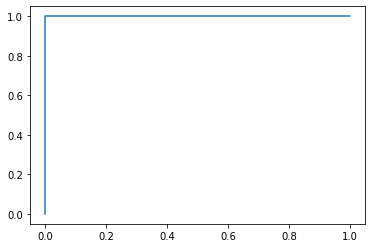

In [ ]:
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc);

#### Plot Random Forest ROC

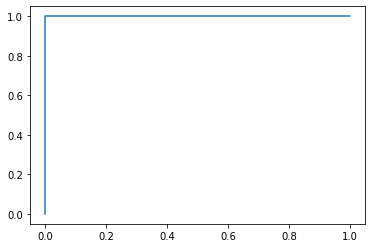

In [ ]:
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % random_forest_optimization_roc_auc);

#### Plot Base Rate ROC

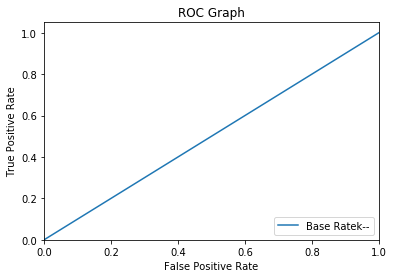

In [ ]:
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()